In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

*Separating Categorical from Continuous Variables*

In [4]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')
print (df_cat.shape, df_num.shape)

(1460, 43) (1460, 38)


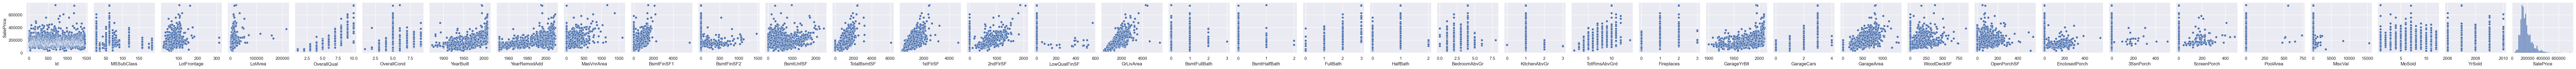

In [5]:
# Plot of all numerical variables against SalePrice
sns.pairplot(df_num, y_vars=['SalePrice'], x_vars=df_num.columns.values)


In [6]:
df_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
# Checking correlation between numerical variables
df_num.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [10]:
#Checking correlation between numerical variables and SalePrice
df_num.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

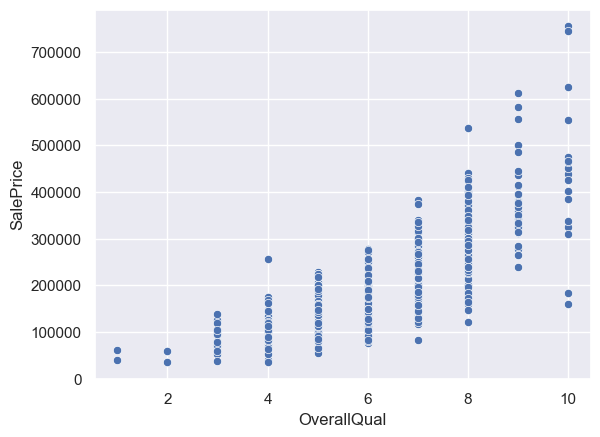

In [11]:
sns.scatterplot(data=df_num, x='OverallQual', y='SalePrice')

/var/folders/yb/s95tfwgn1mx2gbc35cktptdw0000gn/T/ipykernel_22471/687152113.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

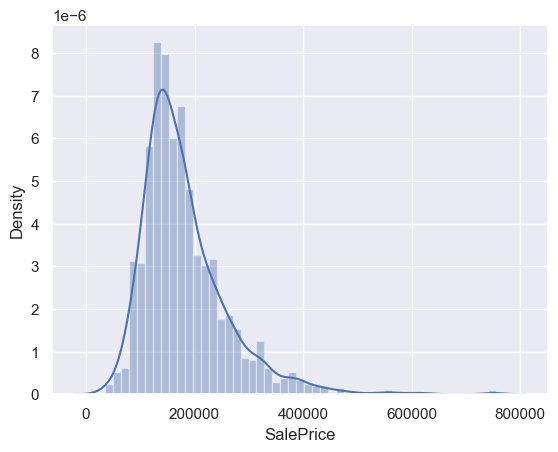

In [12]:
#Check distribution of SalesPrice visually
sns.distplot(df['SalePrice'])

In [13]:
df.shape

(1460, 81)

In [14]:
#Find outliers in SalePrice basis some reasonable IQR. Take care that Outliers should not be more than 2% of the total dataseta
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
df['SalePrice'].describe()
Out_Upper = Q3 + 2.5 * IQR
Qut_Lower = Q1 - 2.5 * IQR
#Find outliers in SalePrice basis Out_Upper and Out_Lower
df[(df['SalePrice'] > Out_Upper) | (df['SalePrice'] < Qut_Lower)].shape[0] / df.shape[0] * 100

1.4383561643835616

In [15]:
df_SalePrice_Outliers_Removed = df[(df['SalePrice'] < Out_Upper) & (df['SalePrice'] > Qut_Lower)]
df_SalePrice_Outliers_Removed.shape

(1439, 81)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

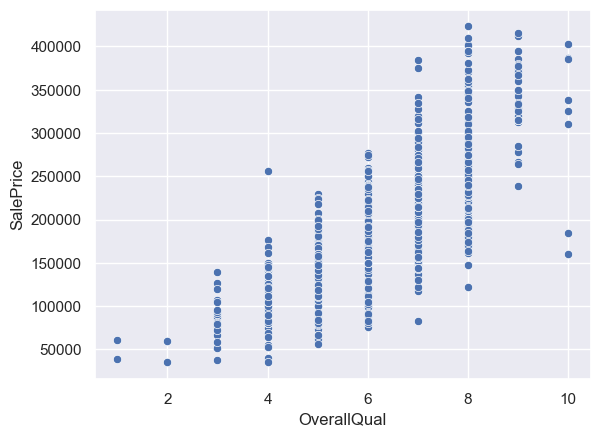

In [16]:
sns.scatterplot(data=df_SalePrice_Outliers_Removed, x='OverallQual', y='SalePrice')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

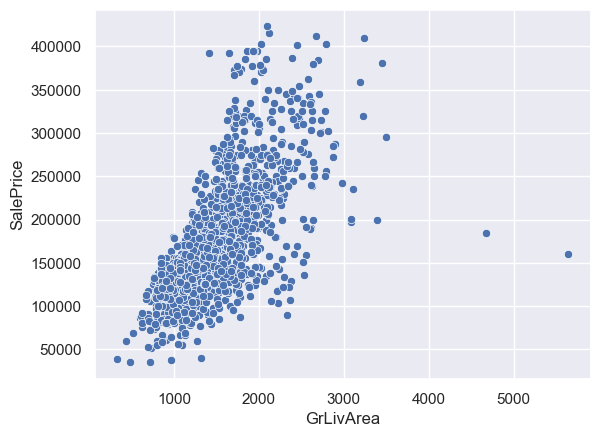

In [17]:
sns.scatterplot(data=df_SalePrice_Outliers_Removed, x='GrLivArea', y='SalePrice')

In [18]:
df_SalePrice_Outliers_Removed[(df_SalePrice_Outliers_Removed['GrLivArea'] > 4000) & (df_SalePrice_Outliers_Removed['SalePrice'] < 300000)]
#Remove the above outliers
df_SalePrice_Outliers_Removed = df_SalePrice_Outliers_Removed.drop([523,1298], axis=0)

In [19]:
df_SalePrice_Outliers_Removed.shape

(1437, 81)

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

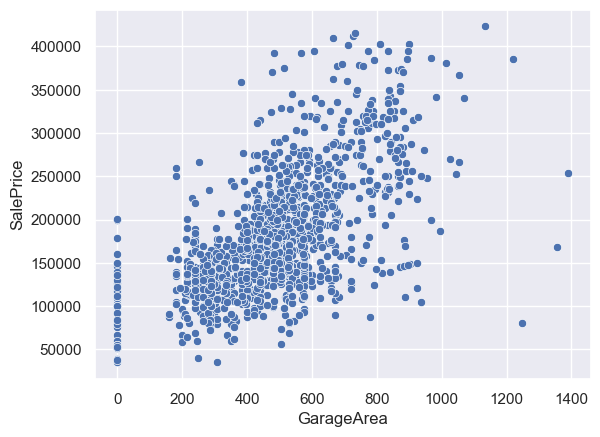

In [20]:
sns.scatterplot(x = df_SalePrice_Outliers_Removed['GarageArea'], y = df_SalePrice_Outliers_Removed['SalePrice'])

In [21]:
df_SalePrice_Outliers_Removed[df_SalePrice_Outliers_Removed['GarageArea']] > 1200

KeyError: "None of [Index([548, 460, 608, 642, 836, 480, 636, 484, 468, 205,\n       ...\n         0, 840, 525,   0, 400, 460, 500, 252, 240, 276],\n      dtype='int64', length=1437)] are in the [columns]"

### Numerical Features which seem to have a correlation with sales price basis scatterplot and correlation coefficient

1. MSSubClass: Identifies the type of dwelling involved in the sale. Has numerical values denoting the dwelling type.
2. MSZoning: Categorical feature which denotes zoning classification. Agri, comm etc.
3. LotFrontage: Linear feet of street connected to property.
4. LotArea: Large variation, outliers also present.
5. OverallQual - Quality of materials used
6. OverallCond
7. 

### Categorical Features which seem to have a correlation with sales price basis boxplot